## Step 0: Import Required LibrariesStep 0: Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

## Step 1: Look at the Big Picture

**Problem Type**: Supervised Learning – Regression.

**Objective**: Predict median house value based on housing features.

**Evaluation Metrics**: RMSE, MAE, R².

## Step 2: Get the Data

In [3]:
# Load California housing dataset
housing = fetch_california_housing(as_frame=True)
# Create DataFrame
df = housing.frame
# Display basic info
df.head()
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


## Step 3: Discover the Data (EDA)

In [4]:
df.describe()
# Check missing values
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

## Step 4: Visualize the Data

4.1 Distribution of House Prices

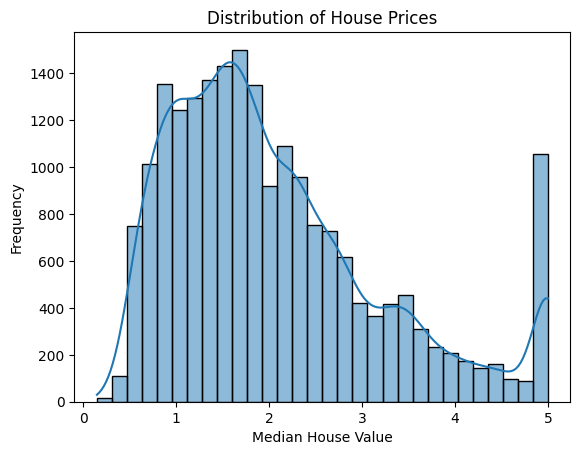

In [5]:
plt.figure()
sns.histplot(df['MedHouseVal'], bins=30, kde=True)
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.title('Distribution of House Prices')
plt.show()

4.2 Income vs House Price

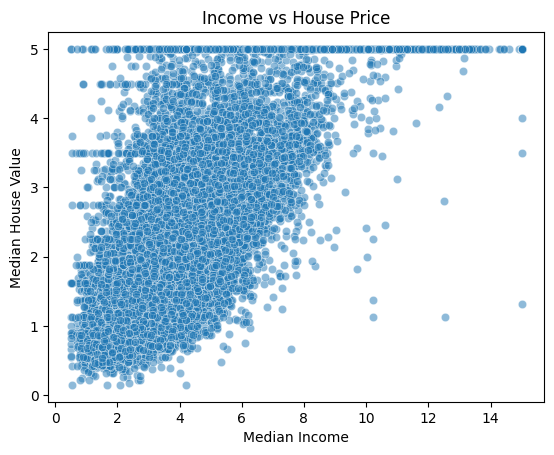

In [6]:
plt.figure()
sns.scatterplot(x=df['MedInc'], y=df['MedHouseVal'], alpha=0.5)
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Income vs House Price')
plt.show()

4.3 Correlation Heatmap

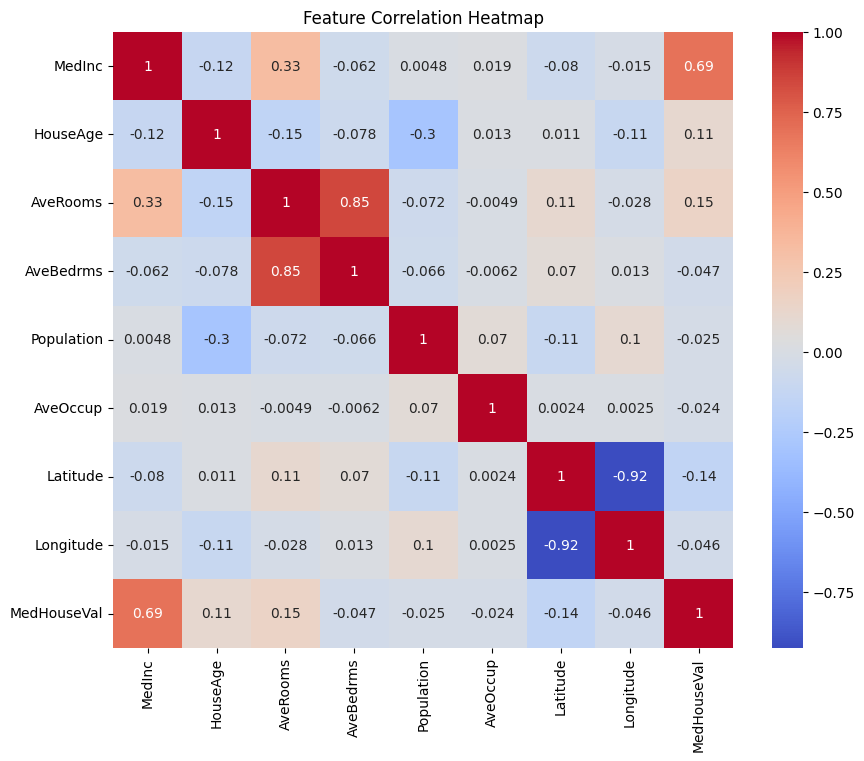

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

4.4 Location-based Visualization

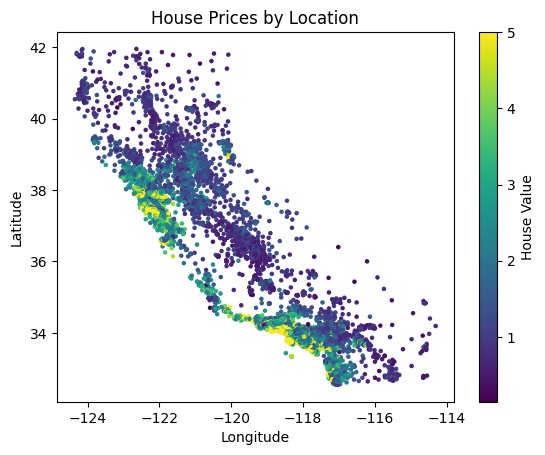

In [8]:
plt.figure()
plt.scatter(df['Longitude'], df['Latitude'],
c=df['MedHouseVal'], cmap='viridis', s=5)

plt.colorbar(label='House Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('House Prices by Location')
plt.show()

## Step 5: Prepare the Data

5.1 Feature Engineering

In [9]:
df['RoomsPerHousehold'] = df['AveRooms'] / df['HouseAge']

5.2 Train–Test Split

In [10]:
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42
)

5.3 Feature Scaling

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Step 6: Select and Train a Baseline Model
6.1 Linear Regression

In [12]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred_lr = lin_reg.predict(X_test_scaled)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr, mae_lr, r2_lr

(np.float64(0.7449540928043491), 0.5330139776645934, 0.5765012224420747)

## Step 7: Train Advanced Models
7.1 Decision Tree Regressor

In [13]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
rmse_dt

np.float64(0.7138377373947808)

7.2 Random Forest Regressor

In [14]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rmse_rf

np.float64(0.5128644706054181)

## Step 8: Fine-Tune the Model

8.1 Hyperparameter Tuning (Random Forest)

In [15]:
param_grid = {
'n_estimators': [50, 100],
'max_depth': [None, 10, 20],
'min_samples_split': [2, 5]
}
grid_search = GridSearchCV(
rf, param_grid, cv=3,
scoring='neg_mean_squared_error'
)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
rmse_best

np.float64(0.5132629837109113)

## Step 9: Model Comparison

In [16]:
results_data = {'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'Tuned Random Forest'],
'RMSE': [rmse_lr, rmse_dt, rmse_rf, rmse_best]
}
results = pd.DataFrame(
    results_data
)

results



,Model,RMSE
0,Linear Regression,0.744954
1,Decision Tree,0.713838
2,Random Forest,0.512864
3,Tuned Random Forest,0.513263


### Best performing Model

In [17]:
min_row = results.loc[results['RMSE'].idxmin()]

print(f"Best performing model :  {min_row['Model']} \nWith best RMSE :  {min_row['RMSE']}")


Best performing model :  Random Forest 
With best RMSE :  0.5128644706054181
